# Pandas - Introduction

This notebook explans how to use the `pandas` library for analysis of tabular data.

In [1]:
# Start using pandas (default import convention)
import pandas as pd
import numpy as np

In [2]:
# Let pandas speak for themselves
print(pd.__doc__)


pandas - a powerful data analysis and manipulation library for Python

**pandas** is a Python package providing fast, flexible, and expressive data
structures designed to make working with "relational" or "labeled" data both
easy and intuitive. It aims to be the fundamental high-level building block for
doing practical, **real world** data analysis in Python. Additionally, it has
the broader goal of becoming **the most powerful and flexible open source data
analysis / manipulation tool available in any language**. It is already well on
its way toward this goal.

Main Features
-------------
Here are just a few of the things that pandas does well:

  - Easy handling of missing data in floating point as well as non-floating
    point data.
  - Size mutability: columns can be inserted and deleted from DataFrame and
    higher dimensional objects
  - Automatic and explicit data alignment: objects can be explicitly aligned
    to a set of labels, or the user can simply ignore the labels and

Visit the official website for a nicely written documentation: https://pandas.pydata.org

In [3]:
# Current version (should be 1.5+ in 2023)
print(pd.__version__)

1.5.3


## Basic objects 

The **pandas** library has a vast API with many useful functions. However, most of this revolves
around two important classes:

* Series
* DataFrame

In this introduction, we will focus on them - what each of them does and how they relate to each other
and numpy objects.

### Series

Series is a one-dimensional data structure, central to pandas. 

For a complete API, visit https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [4]:
# My first series
series = pd.Series([1, 2, 3])
series

0    1
1    2
2    3
dtype: int64

This looks a bit like a Numpy array, does it not?

Actually, in most cases the Series wraps a Numpy array...

In [5]:
series.values  # The result is a Numpy array

array([1, 2, 3], dtype=int64)

But there is something more. Alongside the values, we see that each item (or "row") has a certain label. The collection of labels is called **index**.

In [6]:
series.index

RangeIndex(start=0, stop=3, step=1)

This index (see below) can be used, as its name suggests, to index items of the series.

In [7]:
# Return an element from the series
series.loc[1]

2

In [8]:
# Or
series[1]

2

In [9]:
# Construction from a dictionary
series_ab = pd.Series({"a": 2, "b": 4})
series_ab

a    2
b    4
dtype: int64

**Exercise**: Create a series with 5 elements.

In [10]:
result = ...

### DataFrame

A **DataFrame** is pandas' answer to Excel sheets - it is a collection of named columns (or, in our case, a collection of **Series**).
Quite often, we directly read data frames from an external source, but it is possible to create them from:
* a dict of Series, numpy arrays or other array-like objects
* from an iterable of rows (where rows are Series, lists, dictionaries, ...)

In [11]:
# List of lists (no column names)
table = [
    ['a', 1],
    ['b', 3],
    ['c', 5]
]
table_df = pd.DataFrame(table)
table_df

,0,1
0,a,1
1,b,3
2,c,5


In [12]:
# Dict of Series (with column names)
df = pd.DataFrame({
    'number': pd.Series([1, 2, 3, 4], dtype=np.int8),
    'letter': pd.Series(['a', 'b', 'c', 'd'])
})
df

,number,letter
0,1,a
1,2,b
2,3,c
3,4,d


In [13]:
# Numpy array (10x2), specify column names
data = np.random.normal(0, 1, (10, 2))

df = pd.DataFrame(data, columns=['a', 'b'])
df

,a,b
0,-0.229884,-0.724777
1,0.266215,0.071570
2,0.746324,1.301924
3,0.044155,1.077540
4,-0.952541,1.178086
5,0.284503,1.349844
6,-0.226015,0.084956
7,1.212773,0.485195
8,-1.713499,0.819256
9,0.331778,0.599748


In [14]:
# A DataFrame also has an index.
df.index

RangeIndex(start=0, stop=10, step=1)

In [15]:
# ...that is shared by all columns
df.index is df["a"].index

True

In [16]:
# The columns also form an index.
df.columns

Index(['a', 'b'], dtype='object')

## D(ata) types

Pandas builds upon the numpy data types (mentioned earlier) and adds a couple of more.

In [17]:
typed_df = pd.DataFrame({
  "bool": np.arange(5) % 2 == 0,
  "int": range(5),
  "int[nan]": pd.Series([np.nan, 0, 1, 2, 3], dtype="Int64"),
  "float": np.arange(5) * 3.14,
  "complex": np.array([1 + 2j, 2 + 3j, 3 + 4j, 4 + 5j, 5 + 6j]),
  "object": [None, 1, "2", [3, 4], 5 + 6j],
  "string?": ["a", "b", "c", "d", "e"],
  "string!": pd.Series(["a", "b", "c", "d", "e"], dtype="string"),
  "datetime": pd.date_range('2018-01-01', periods=5, freq='3M'),
  "timedelta": pd.timedelta_range(0, freq="1s", periods=5),
  "category": pd.Series(["animal", "plant", "animal", "animal", "plant"], dtype="category"),
  "period": pd.period_range('2018-01-01', periods=5, freq='M'),
})
typed_df

,bool,int,int[nan],float,complex,object,string?,string!,datetime,timedelta,category,period
0,True,0,<NA>,0.00,1.0+2.0j,None,a,a,2018-01-31,0 days 00:00:00,animal,2018-01
1,False,1,0,3.14,2.0+3.0j,1,b,b,2018-04-30,0 days 00:00:01,plant,2018-02
2,True,2,1,6.28,3.0+4.0j,2,c,c,2018-07-31,0 days 00:00:02,animal,2018-03
3,False,3,2,9.42,4.0+5.0j,"[3, 4]",d,d,2018-10-31,0 days 00:00:03,animal,2018-04
4,True,4,3,12.56,5.0+6.0j,(5+6j),e,e,2019-01-31,0 days 00:00:04,plant,2018-05


In [18]:
typed_df.dtypes

bool                    bool
int                    int64
int[nan]               Int64
float                float64
complex           complex128
object                object
string?               object
string!               string
datetime      datetime64[ns]
timedelta    timedelta64[ns]
category            category
period             period[M]
dtype: object

We will see some of the types practically used in further analysis.

## Indices & indexing



In [19]:
abc_series = pd.Series(range(3), index=["a", "b", "c"])
abc_series

a    0
b    1
c    2
dtype: int64

In [20]:
abc_series.index

Index(['a', 'b', 'c'], dtype='object')

In [21]:
abc_series.index = ["c", "d", "e"]  # Changes the labels in-place!
abc_series.index.name = "letter"
abc_series

letter
c    0
d    1
e    2
dtype: int64

In [22]:
table = [
    ['a', 1],
    ['b', 3],
    ['c', 5]
]
table_df = pd.DataFrame(
    table,
    index=["first", "second", "third"],
    columns=["alpha", "beta"]
)
table_df

,alpha,beta
first,a,1
second,b,3
third,c,5


In [23]:
alpha = table_df["alpha"]  # Simple [] indexing in DataFrame returns Series
alpha

first     a
second    b
third     c
Name: alpha, dtype: object

In [24]:
alpha["second"]             # Simple [] indexing in Series returns scalar values.

'b'

In [25]:
alpha.second   # This also works

'b'

but careful!

In [26]:
alpha.first

<bound method NDFrame.first of first     a
second    b
third     c
Name: alpha, dtype: object>

A slice with a `["list", "of", "columns"]` yields a `DataFrame` with those columns. 

For example:

In [27]:
table_df[["beta", "alpha"]]

,beta,alpha
first,1,a
second,3,b
third,5,c


`[["column_name"]]` returs a `DataFrame` as well, not `Series`:

In [28]:
table_df[["alpha"]]

,alpha
first,a
second,b
third,c


There are two ways how to properly index rows & cells in the DataFrame:

- `loc` for label-based indexing
- `iloc` for order-based indexing (it does not use the **index** at all)

Note the square brackets. The mentioned attributes actually are not methods
but special "indexer" objects. They accept one or two arguments specifying
the position along one or both axes.

**Exercise:** Create `DataFrame` whose `x`-column is $0, \frac{1}{4}\pi, \frac{1}{2}\pi, .. 2\pi $, `y` column is `cos(x)` and index are `fractions` `0, 1/4, 1/2 ... 2`

In [29]:
import fractions

index = [fractions.Fraction(n, ___) for n in range(___)]
x = np.___([___ for ___ in ___])
y = ___

df = pd.DataFrame(___, index = ___)

# display
df

TypeError: 'method' object cannot be interpreted as an integer

#### loc


In [30]:
first = table_df.loc["first"]
first

alpha    a
beta     1
Name: first, dtype: object

In [31]:
table_df.loc["first", "beta"]            

1

In [32]:
table_df.loc["first":"second", "beta"]   # Use ranges (inclusive)

first     1
second    3
Name: beta, dtype: int64

#### iloc

In [33]:
table_df.iloc[1]

alpha    b
beta     3
Name: second, dtype: object

In [34]:
table_df.iloc[0:4:2]   # Select every second row

,alpha,beta
first,a,1
third,c,5


In [35]:
table_df.at["first", "beta"]

1

In [36]:
type(table_df.at)

pandas.core.indexing._AtIndexer

## Modifying DataFrames

Adding a new column is like adding a key/value pair to a dict.
Note that this operation, unlike most others, does modify the DataFrame.

In [37]:
from datetime import datetime
table_df["now"] = datetime.now()
table_df

,alpha,beta,now
first,a,1,2023-02-22 00:35:02.831390
second,b,3,2023-02-22 00:35:02.831390
third,c,5,2023-02-22 00:35:02.831390


Non-destructive version that returns a new DataFrame, uses the `assign` method:

In [38]:
table_df.assign(delta = [True, False, True])

,alpha,beta,now,delta
first,a,1,2023-02-22 00:35:02.831390,True
second,b,3,2023-02-22 00:35:02.831390,False
third,c,5,2023-02-22 00:35:02.831390,True


In [39]:
# However, the original DataFrame is not changed
table_df

,alpha,beta,now
first,a,1,2023-02-22 00:35:02.831390
second,b,3,2023-02-22 00:35:02.831390
third,c,5,2023-02-22 00:35:02.831390


Deleting a column is very easy too.

In [40]:
del table_df["now"]
table_df

,alpha,beta
first,a,1
second,b,3
third,c,5


The **drop** method works with both rows and columns (creating a new data frame), returning a new object.

In [41]:
table_df.drop("beta", axis=1)

,alpha
first,a
second,b
third,c


In [42]:
table_df.drop("second", axis=0)

,alpha,beta
first,a,1
third,c,5


**Exercise:** Use a combination of `reset_index`, `drop` and `set_index` to transform `table_df` into `pd.DataFrame({'index': table_df.index}, index=table_df["alpha"])`

In [43]:
results = table_df.___.___.___

# display
result

AttributeError: 'DataFrame' object has no attribute '___'

**Let's get some real data!**

## I/O in pandas

Pandas can read (and write to) a huge variety of file formats. More details can be found in the official documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

Most of the functions for reading data are named `pandas.read_XXX`, where XXX is the format used. We will look at three commonly used ones.

In [44]:
# List functions for input in pandas.

print("\n".join(method for method in dir(pd) if method.startswith("read_")))

read_clipboard
read_csv
read_excel
read_feather
read_fwf
read_gbq
read_hdf
read_html
read_json
read_orc
read_parquet
read_pickle
read_sas
read_spss
read_sql
read_sql_query
read_sql_table
read_stata
read_table
read_xml


### Read CSV

Nowadays, a lot of data comes in the textual Comma-separated values format (CSV).
Although not properly standardized, it is the de-facto standard for files that are not
huge and are meant to be read by human eyes too.

Let's read the population of U.S. states that we will need later:

In [45]:
territories = pd.read_csv("data/us_state_population.csv")
territories.head(9)

,Territory,Population
0,California,39029342
1,Texas,30029572
2,Florida,22244823
3,New York,19677151
4,Pennsylvania,12972008
5,Illinois,12582032
6,Ohio,11756058
7,Georgia,10912876
8,North Carolina,10698973


The automatic data type parsing converts columns to appropriate types:

In [46]:
territories.dtypes

Territory     object
Population     int64
dtype: object

Sometimes the CSV input does not work out of the box. Although pandas automatically understands and reads zipped files,
it usually does not automatically infer the file format and its variations - for details, see the `read_csv` documentation here: 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [47]:
pd.read_csv('data/iris.tsv.gz')

,Sepal length\tSepal width\tPetal length\tPetal width\tSpecies
0,5.1\t3.5\t1.4\t0.2\tI. setosa
1,4.9\t3.0\t1.4\t0.2\tI. setosa
2,4.7\t3.2\t1.3\t0.2\tI. setosa
3,4.6\t3.1\t1.5\t0.2\tI. setosa
4,5.0\t3.6\t1.4\t0.2\tI. setosa


...in this case, the CSV file does not use commas to separate values. Therefore, we need to specify an extra argument:

In [48]:
pd.read_csv("data/iris.tsv.gz", sep='\t')

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,I. setosa
1,4.9,3.0,1.4,0.2,I. setosa
2,4.7,3.2,1.3,0.2,I. setosa
3,4.6,3.1,1.5,0.2,I. setosa
4,5.0,3.6,1.4,0.2,I. setosa


See the difference?

### Read Excel

Let's read the list of U.S. incidents when lasers interfered with airplanes.

In [49]:
pd.read_excel("data/laser_incidents_2019.xlsx")

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State
0,2019-01-01,35,N3EG,C421,2500,SAT,Green,No,San Antonio,Texas
1,2019-01-01,43,RPA3469,E75S,4000,IAH,Green,No,Houston,Texas
2,2019-01-01,44,UAL1607,A319,4000,IAH,Green,No,Houston,Texas
3,2019-01-01,110,N205TM,BE20,2500,HDC,Green,No,Hammond,Louisiana
4,2019-01-01,115,JIA5233,CRJ9,2000,JAX,Green,No,Jacksonville,Florida
...,...,...,...,...,...,...,...,...,...,...
6131,2019-12-31,845,ASH5861,CRJ9,3000,JAN,Green,No,Jackson,Mississippi
6132,2019-12-31,929,N22P,CRUZ,2500,HNL,Green,No,Honolulu,Hawaii
6133,2019-12-31,2310,GTH530,GLF4,500,SJU,White,No,Carolina,Puerto Rico
6134,2019-12-31,2312,AMF6916,SW4,600,SJU,Green,No,Carolina,Puerto Rico


Note: This reads just the first sheet from the file. If you want to extract more sheets, you will need to use the `pandas.'ExcelFile` class. See the [relevant part](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#reading-excel-files) of the documentation.

### Read HTML (Optional)

Pandas is able to scrape data from tables embedded in web pages using the `read_html` function.
This might or might not bring you good results and probably you will have to tweak your
data frame manually. But it is a good starting point - much better than being forced to parse
the HTML ourselves!

In [50]:
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_laser_types")
type(tables), len(tables)

(list, 9)

In [51]:
tables[1]

,Laser gain medium and type,Operation wavelength(s),Pump source,Applications and notes
0,Helium–neon laser,"632.8 nm (543.5 nm, 593.9 nm, 611.8 nm, 1.1523...",Electrical discharge,"Interferometry, holography, spectroscopy, barc..."
1,Argon laser,"454.6 nm, 488.0 nm, 514.5 nm (351 nm, 363.8, 4...",Electrical discharge,"Retinal phototherapy (for diabetes), lithograp..."
2,Krypton laser,"416 nm, 530.9 nm, 568.2 nm, 647.1 nm, 676.4 nm...",Electrical discharge,"Scientific research, mixed with argon to creat..."
3,Xenon ion laser,Many lines throughout visible spectrum extendi...,Electrical discharge,Scientific research.
4,Nitrogen laser,337.1 nm,Electrical discharge,"Pumping of dye lasers, measuring air pollution..."
5,Carbon dioxide laser,"10.6 μm, (9.4 μm)",Transverse (high-power) or longitudinal (low-p...,"Material processing (laser cutting, laser beam..."
6,Carbon monoxide laser,"2.6 to 4 μm, 4.8 to 8.3 μm",Electrical discharge,"Material processing (engraving, welding, etc.)..."
7,Excimer laser,"157 nm (F2), 193.3 nm (ArF), 248 nm (KrF), 308...",Excimer recombination via electrical discharge,Ultraviolet lithography for semiconductor manu...


In [52]:
tables[2]

,Laser gain medium and type,Operation wavelength(s),Pump source,Applications and notes
0,Hydrogen fluoride laser,2.7 to 2.9 μm for hydrogen fluoride (<80% atmo...,Chemical reaction in a burning jet of ethylene...,"Used in research for laser weaponry, operated ..."
1,Deuterium fluoride laser,~3800 nm (3.6 to 4.2 μm) (~90% atm. transmitta...,chemical reaction,US military laser prototypes.
2,COIL (chemical oxygen–iodine laser),1.315 μm (<70% atmospheric transmittance),Chemical reaction in a jet of singlet delta ox...,"Military lasers, scientific and materials rese..."
3,Agil (All gas-phase iodine laser),1.315 μm (<70% atmospheric transmittance),Chemical reaction of chlorine atoms with gaseo...,"Scientific, weaponry, aerospace."


### Write CSV

Pandas is able to write to many various formats but the usage is similar. 

In [53]:
tables[1].to_csv("gas_lasers.csv", index=False)

## Data analysis (very basics)

Let's extend the data of laser incidents to a broader time range and read the data from a summary CSV file:

In [54]:
# You can skip executing this cell. The file is included in the repository.

available_reports = (
    "https://www.faa.gov/about/initiatives/lasers/laws/media/Laser_Report_2020.xlsx",
    "https://www.faa.gov/about/initiatives/lasers/laws/media/Laser_Report_2019_final.xlsx",
    "https://www.faa.gov/about/initiatives/lasers/laws/media/Laser_Report_2018_final.xlsx",
    "https://www.faa.gov/about/initiatives/lasers/laws/media/reported_laser_illumination_incidents_CY_2017.xlsx",
    "https://www.faa.gov/about/initiatives/lasers/laws/media/reported_laser_illumination_incidents_CY_2016.xlsx",
    "https://www.faa.gov/about/initiatives/lasers/laws/media/reported_laser_illumination_incidents_CY_2015.xls",
    # the columns here are very different, skip it for this analysis
    # "https://www.faa.gov/about/initiatives/lasers/laws/media/laser_incidents_2010-2014.xls",
)

# *** Uncomment to regenerate the source file:
# laser_incidents_raw = pd.concat((pd.read_excel(url) for url in available_reports), axis=0, ignore_index=True)
# laser_incidents_raw.to_csv("data/laser_incidents_2015-2020_raw.csv")

In [55]:
laser_incidents_raw = pd.read_csv("data/laser_incidents_2015-2020_raw.csv")

C:\Users\janpi\AppData\Local\Temp\ipykernel_23748\2442758411.py:1: DtypeWarning: Columns (2,10,68) have mixed types. Specify dtype option on import or set low_memory=False.
  laser_incidents_raw = pd.read_csv("data/laser_incidents_2015-2020_raw.csv")


Let's see what we have here...

In [56]:
laser_incidents_raw.head()

,Unnamed: 0,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Aviation Altitude,State
0,0,2020-01-01,148,N424RP,DA42/A,8500,SBA,Green,No,Santa Barbara,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-01-01,155,AMF1829,B190,40000,SSF,Green,No,San Antonio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-01-01,214,NKS1881,A320,2500,TPA,Green,No,Tampa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020-01-01,217,FDX3873,B763,3000,DFW,Green,No,Fort Worth,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020-01-01,218,SWA3635,B739,11000,MOD,Green,No,Modesto,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
laser_incidents_raw.tail()

,Unnamed: 0,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Aviation Altitude,State
36458,36458,2015-12-31,525,VRD917,A320 (AIRBUS - A-32,8000,LAS,Green,No,Las Vegas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nevada
36459,36459,2015-12-31,623,DAL2371,B738 (BOEING - 737-,11000,LHM,Green,No,Lincoln,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California
36460,36460,2015-12-31,1111,Unknown,Unknown,2000,FOK,Green,No,Westhampton Beach,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York
36461,36461,2015-12-31,1147,UAL197,B737,300,GUM,Green,No,Guam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guam
36462,36462,2015-12-31,2314,EJA336,E55P/L,1000,APF,Green,No,Naples,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Florida


For an unknown, potentially unevenly distributed dataset, looking at the beginning / end is typically not the best idea. We'd rather sample randomly:

In [58]:
# Show a few examples
laser_incidents_raw.sample(10)

,Unnamed: 0,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Aviation Altitude,State
23968,23968,2016-04-14,535,URF504,PC12,7000,OXR,Green,No,Oxnard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7606,7606,2019-10-03,50,JKA90,CH7/A,4500,OKC,Green,No,Oklahoma City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22158,22158,2016-01-20,304,AAL422,A319,10000,PHX,Green,No,Phoenix,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8380,8380,2019-11-15,43,SKW3591,CRJ9,13000,MSP,Blue,No,Minneapolis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4065,4065,2019-02-26,200,DAL2441,B712,7000,CLT,Green,No,Charlotte,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28114,28114,2016-11-24,425,SKW5649,CRJ2,6000,VNY,Red,No,Van Nuys,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26789,26789,2016-09-30,256,SWA310,B757,2300,ONT,Green,No,Ontario,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,721,2020-02-11,215,SKW3056,CRJ7,7000,ORD,Green,No,Chicago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26748,26748,2016-09-28,210,MRA637,C208,2000,TUL,Green,No,Tulsa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32076,32076,2015-07-16,500,RDDL455,C130 (LOCKHEED - AC,8000,PHX,Green,No,Phoenix,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona


This does not look right. What we need to do, is **data cleaning**.

### Data cleaning

In [59]:
# use only meaningful columns, not Unnamed ...
laser_incidents = laser_incidents_raw[
    [column for column in laser_incidents_raw.columns if "Unnamed" not in column]
]
laser_incidents.columns

Index(['Incident Date', 'Incident Time', 'Flight ID', 'Aircraft', 'Altitude',
       'Airport', 'Laser Color', 'Injury', 'City', 'State',
       'Aviation Altitude', 'State '],
      dtype='object')

In [60]:
# there are "State" and "State " columns: merge them into a single one
laser_incidents = laser_incidents.assign(
    State=laser_incidents["State"].where(
        laser_incidents["State"].notna(), laser_incidents["State "]
    )
)

In [61]:
# strip white space from state names
laser_incidents = laser_incidents.assign(State=laser_incidents["State"].str.strip())

In [62]:
# drop columns we do not need any more ("Aviation Altitude" are all NA values)
laser_incidents = laser_incidents.drop(columns=["State ", "Aviation Altitude"])

In [63]:
import collections

# needed below for mapping string values to bool
# "yes" and "no" are defined, anything else becomes NA
value_to_bool = collections.defaultdict(lambda: pd.NA)
value_to_bool["yes"] = True
value_to_bool["no"] = False


# try to convert to better dtypes
laser_incidents = laser_incidents.convert_dtypes()
# convert some columns manually with some preprocessing
laser_incidents = laser_incidents.assign(
    **{
        "Incident Time": laser_incidents["Incident Time"].astype("string"),
        "Altitude": pd.to_numeric(laser_incidents["Altitude"], errors="coerce"),
        "Laser Color": laser_incidents["Laser Color"].str.strip().str.lower(),
        "Injury": laser_incidents["Injury"]
            .str.lower()
            .str.strip()
            .map(value_to_bool)
            .astype("boolean"),
    }
)
laser_incidents.dtypes


Incident Date     string
Incident Time     string
Flight ID         string
Aircraft          string
Altitude         float64
Airport           string
Laser Color       string
Injury           boolean
City              string
State             string
dtype: object

In [64]:
# there are suspicious times
laser_incidents.loc[laser_incidents["Incident Time"].astype("string").str.len() > 4]

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State
12690,2018-08-15,24+29:614,DAL2936,B712,15000.0,S19,green,False,McCormick,South Carolina


In [65]:
# make the suspicious times NA
laser_incidents.loc[
    laser_incidents["Incident Time"].astype("string").str.len() > 4, "Incident Time"
] = pd.NA


In [66]:
# using string manipulation and time deltas to construct full time stamps (date + time)
laser_incidents = laser_incidents.assign(
    timestamp = pd.to_datetime(laser_incidents["Incident Date"])
    + pd.to_timedelta(
        laser_incidents["Incident Time"].str[:-2]
        + "h"
        + laser_incidents["Incident Time"].str[-2:]
        + "min",
        errors="coerce",
    )
)

In [67]:
laser_incidents.sample(10)

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State,timestamp
23260,2016-03-11,353,SW658,B737,400.0,BWI,green,False,Baltimore,Maryland,2016-03-11 03:53:00
31117,2015-05-19,355,SWA501,B733,8000.0,LAS,green,False,Las Vegas,Nevada,2015-05-19 03:55:00
21351,2017-12-12,534,SKW3380,E75S,2800.0,SAN,green,False,San Diego,California,2017-12-12 05:34:00
16594,2017-04-05,118,SKW5211,E75L,13000.0,GYY,green,False,Gary,Indiana,2017-04-05 01:18:00
492,2020-01-27,520,SWA19,B737,40000.0,ICT,green,False,Wichita,Kansas,2020-01-27 05:20:00
8258,2019-11-09,21,LTA55,DA40,2500.0,IND,green,False,Indianapolis,Indiana,NaT
27371,2016-10-28,101,SKW3032,CRJ2,8500.0,PHX,green,False,Phoenix,Arizona,2016-10-28 01:01:00
8171,2019-11-04,404,ASA259,B739/L,34000.0,PDX,blue,False,Portland,Oregon,2019-11-04 04:04:00
6438,2019-07-12,708,UAL351,B739/L,12000.0,APC,green,False,Vallejo,California,2019-07-12 07:08:00
4447,2019-03-25,250,FLC55,LJ60,19000.0,OKC,green,False,Oklahoma City,Oklahoma,2019-03-25 02:50:00


In [68]:
laser_incidents.dtypes

Incident Date            string
Incident Time            string
Flight ID                string
Aircraft                 string
Altitude                float64
Airport                  string
Laser Color              string
Injury                  boolean
City                     string
State                    string
timestamp        datetime64[ns]
dtype: object

#### Categorical dtype (Optional)

To analyze **Laser Color**, we can look at its typical values.

In [69]:
laser_incidents["Laser Color"].describe()

count     36461
unique       73
top       green
freq      32787
Name: Laser Color, dtype: object

Not too many different values.

In [70]:
laser_incidents["Laser Color"].unique()

<StringArray>
[                'green',                'purple',                  'blue',
               'unknown',                   'red',                 'white',
       'green and white',       'white and green',      'green and yellow',
              'multiple',                'unknwn',      'green and purple',
         'green and red',         'red and green',        'green and blue',
       'blue and purple',    'red white and blue',        'blue and green',
        'blue or purple',         'blue or green',         'yellow/orange',
           'blue/purple',                 'unkwn',                'orange',
                 'multi',      'yellow and white',        'blue and white',
        'white or amber',         'red and white',                'yellow',
                 'amber',      'yellow and green',        'white and blue',
  'red, blue, and green',           'purple-blue',          'red and blue',
               'magenta',                   'phx',         'green or blue'

In [71]:
laser_incidents["Laser Color"].value_counts(normalize=True)

green                    0.899235
blue                      0.04679
red                       0.01226
white                    0.010395
unkn                     0.009051
                           ...   
red white and blue       0.000027
white-blue               0.000027
yellow and green         0.000027
green, blue or purple    0.000027
white-red                0.000027
Name: Laser Color, Length: 73, dtype: Float64

This column is a very good candidate to turn into a pandas-special, **Categorical** data type. (See https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

In [72]:
laser_incidents["Laser Color"].memory_usage(deep=True)   # ~60 bytes per item

2261232

In [73]:
color_category = laser_incidents["Laser Color"].astype("category")
color_category.sample(10)

14363    green
10419    white
23359    green
31885    green
9834     green
11376    green
23562    white
30731    green
8631     green
5509     green
Name: Laser Color, dtype: category
Categories (73, string): [amber, blue, blue -green, blue and green, ..., yellow and green, yellow and white, yellow-white, yellow/orange]

In [74]:
color_category.memory_usage(deep=True)              # ~1-2 bytes per item

43668

**Exercise:** Are there any other columns in the dataset that you would suggest for conversion to categorical?

#### Integer vs. float

Pandas is generally quite good at guessing (inferring) number types. 
You may wonder why `Altitude` is float and not int though. 
This is a consequence of not having an integer nan in numpy. There's been many discussions about this.

In [75]:
laser_incidents["Altitude"]

0         8500.0
1        40000.0
2         2500.0
3         3000.0
4        11000.0
          ...   
36458     8000.0
36459    11000.0
36460     2000.0
36461      300.0
36462     1000.0
Name: Altitude, Length: 36463, dtype: float64

In [76]:
laser_incidents["Altitude"].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

Quite recently, Pandas introduced nullable types for [working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data), 
for example [nullable integer](https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html#integer-na).

In [ ]:
laser_incidents["Altitude"].astype("Int64")

0         8500
1        40000
2         2500
3         3000
4        11000
         ...  
36458     8000
36459    11000
36460     2000
36461      300
36462     1000
Name: Altitude, Length: 36463, dtype: Int64

### Filtering

Indexing in pandas Series / DataFrames (`[]`) support also boolean (masked) arrays. These arrays can be obtained by applying boolean operations on them.

You can also use standard **comparison operators** like `<`, `<=`, `==`, `>=`, `>`, `!=`. 

It is possible to perform **logical operations** with boolean series too. You need to use `|`, `&`, `^` operators though, not `and`, `or`, `not` keywords. 

As an example, find all California incidents:

In [77]:
is_california = laser_incidents.State == "California"
is_california.sample(10)

23544    False
12943    False
17941    False
35879    False
13552     True
19688     True
27457    False
2220     False
8796     False
17961    False
Name: State, dtype: boolean

Now we can directly apply the boolean mask. (Note: This is no magic. You can construct the mask yourself)

In [78]:
laser_incidents[is_california].sample(10)

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State,timestamp
18482,2017-08-05,412,N60290,C150,2500.0,MYV,green,False,Marysville,California,2017-08-05 04:12:00
9760,2018-01-28,450,AJI638,FA20,1400.0,LRD,green,False,Laredo,California,2018-01-28 04:50:00
19359,2017-09-24,308,N425RR,PAY3,1400.0,SNA,green,False,Santa Ana,California,2017-09-24 03:08:00
16496,2017-03-29,430,ASQ5755,CRJ9,800.0,LGB,green,False,Long Beach,California,2017-03-29 04:30:00
26256,2016-09-01,338,SKW4641,CRJ2,12000.0,FAT,green,False,Fresno,California,2016-09-01 03:38:00
23235,2016-03-10,510,TV9,HELO,900.0,LAX,green,False,Los Angeles,California,2016-03-10 05:10:00
15992,2017-02-26,400,CPZ5731,E170,2200.0,LAX,blue,False,Los Angeles,California,2017-02-26 04:00:00
31077,2015-05-17,9,N6336K,HELO,1500.0,CCB,white,False,Upland,California,NaT
35545,2015-12-02,252,CG6024,H60,4000.0,NFG,green,False,Oceanside,California,2015-12-02 02:52:00
35889,2015-12-11,125,MED3,EC135,2001.0,SCK,green,False,Stockton,California,2015-12-11 01:25:00


Or maybe we should include the whole West coast?

In [79]:
# isin takes an array of possible values
west_coast = laser_incidents[laser_incidents.State.isin(["California", "Oregon", "Washington"])]
west_coast.sample(10)

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State,timestamp
8806,2019-12-07,156,ASA700,B739,7000.0,SEA,green,False,Seattle,Washington,2019-12-07 01:56:00
15810,2017-02-17,750,N800GM,C560,2000.0,FAT,green,False,Fresno,California,2017-02-17 07:50:00
17677,2017-06-16,517,N1882S,C172,1900.0,SBA,green,False,Santa Barbara,California,2017-06-16 05:17:00
9289,2019-12-31,315,BTQ356,PC12,6000.0,PDT,blue,False,Pendleton,Oregon,2019-12-31 03:15:00
21491,2017-12-19,605,AAL627,A319,4000.0,OAK,green,False,Oakland,California,2017-12-19 06:05:00
32650,2015-08-10,625,UAL1636,B753/L,13000.0,VTU,green,False,Oxnard,California,2015-08-10 06:25:00
23823,2016-04-06,538,SWA1418,B737,8000.0,SAN,green,False,San Diego,California,2016-04-06 05:38:00
34941,2015-11-11,1609,FDX1588,H/DC10,9000.0,OAK,green,False,Oakland,California,2015-11-11 16:09:00
9413,2018-01-07,521,SKW5277,CRJ2,16700.0,PMD,green,False,Palmdale,California,2018-01-07 05:21:00
13840,2018-10-29,438,DAL825,B739,8000.0,SJC,green,False,San Jose,California,2018-10-29 04:38:00


Or low-altitude incidents?

In [80]:
laser_incidents[laser_incidents.Altitude < 300]

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State,timestamp
71,2020-01-04,402,AAL633,A21N,0.0,ELP,unknown,False,El Paso,Texas,2020-01-04 04:02:00
267,2020-01-14,112,17223,C172,200.0,SRQ,green,False,Sarasota,Florida,2020-01-14 01:12:00
400,2020-01-21,2049,N106NK,C172,0.0,ADS,red,False,Addison,Texas,2020-01-21 20:49:00
613,2020-02-03,150,FDX57,DC10,100.0,BQN,green,False,Aguadilla,Puerto Rico,2020-02-03 01:50:00
1066,2020-03-01,514,CR6562,HELI,200.0,PBI,green,False,West Palm Beach,Florida,2020-03-01 05:14:00
...,...,...,...,...,...,...,...,...,...,...,...
35801,2015-12-09,54,N80298,C172,200.0,MIA,red,False,Miami,Florida,NaT
35892,2015-12-11,135,N488SR,C525,160.0,DUA,unkn,False,Durant,Oklahoma,2015-12-11 01:35:00
36089,2015-12-16,351,UPS1337,B763,170.0,LEX,green,False,Lexington,Kentucky,2015-12-16 03:51:00
36156,2015-12-18,454,UPS1295,A306,170.0,LEX,green,False,Lexington,Kentucky,2015-12-18 04:54:00


### Visualization intermezzo

Without much further ado, let's create our first plot.

In [81]:
# Most frequent states
laser_incidents["State"].value_counts()[:20]

California        7268
Texas             3620
Florida           2702
Arizona           1910
Colorado           988
Washington         982
Kentucky           952
Illinois           946
New York           921
Puerto Rico        912
Oregon             895
Tennessee          888
Nevada             837
Pennsylvania       826
Indiana            812
Utah               789
Ohio               750
Georgia            714
North Carolina     605
Missouri           547
Name: State, dtype: Int64

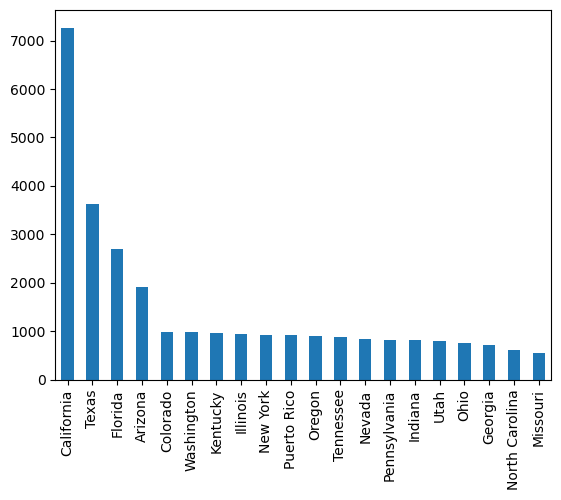

In [82]:
laser_incidents["State"].value_counts()[:20].plot(kind="bar");

## Sorting

In [83]:
# Display 5 incidents with the highest altitude
laser_incidents.sort_values("Altitude", ascending=False).head(5)

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State,timestamp
21173,2017-12-04,1149,ROU1628,B763,240000.0,PBI,green,False,West Palm Beach,Florida,2017-12-04 11:49:00
12017,2018-06-30,315,UPS797,A306,125000.0,ABQ,green,False,Albuquerque,New Mexico,2018-06-30 03:15:00
27807,2016-11-13,253,LSFD1,EC,100000.0,SJC,blue,False,San Jose,California,2016-11-13 02:53:00
21049,2017-12-01,132,ASQ5334,CRJ7,100000.0,RDU,green,False,Raleigh,North Carolina,2017-12-01 01:32:00
27785,2016-11-12,2311,ASH6193,CRJ7,98400.0,IND,green,False,Indianapolis,Indiana,2016-11-12 23:11:00


In [84]:
# Alternative
laser_incidents.nlargest(5, "Altitude")

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State,timestamp
21173,2017-12-04,1149,ROU1628,B763,240000.0,PBI,green,False,West Palm Beach,Florida,2017-12-04 11:49:00
12017,2018-06-30,315,UPS797,A306,125000.0,ABQ,green,False,Albuquerque,New Mexico,2018-06-30 03:15:00
21049,2017-12-01,132,ASQ5334,CRJ7,100000.0,RDU,green,False,Raleigh,North Carolina,2017-12-01 01:32:00
27807,2016-11-13,253,LSFD1,EC,100000.0,SJC,blue,False,San Jose,California,2016-11-13 02:53:00
27785,2016-11-12,2311,ASH6193,CRJ7,98400.0,IND,green,False,Indianapolis,Indiana,2016-11-12 23:11:00


**Exercise:** Find the last 3 incidents with blue laser.

## Arithmetics and string manipulation

Standard **arithmetic operators** work on numerical columms too. And so do mathematical functions. Note all such operations are performed in a vector-like fashion.

In [85]:
altitude_meters = laser_incidents["Altitude"] * .3048
altitude_meters.sample(10)

31351    3352.80
23817     457.20
20468    2743.20
13347     396.24
12223     213.36
10191     457.20
22890     914.40
12610    3048.00
10704     609.60
14923    1524.00
Name: Altitude, dtype: float64

You may mix columns and scalars, the string arithmetics also works as expected.

In [86]:
laser_incidents["City"] + ", " + laser_incidents["State"]

0          Santa Barbara, California
1                 San Antonio, Texas
2                     Tampa, Florida
3                 Fort Worth , Texas
4                Modesto, California
                    ...             
36458              Las Vegas, Nevada
36459            Lincoln, California
36460    Westhampton Beach, New York
36461                     Guam, Guam
36462                Naples, Florida
Length: 36463, dtype: string

### Summary statistics

The `describe` method shows summary statistics for all the columns:

In [87]:
laser_incidents.describe()

,Altitude
count,36218.000000
mean,7358.314264
std,7642.686712
min,0.000000
25%,2500.000000
50%,5000.000000
75%,9700.000000
max,240000.000000


In [88]:
laser_incidents.describe(include="all", datetime_is_numeric=True)

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State,timestamp
count,36463,36462,36451,36411,36218.000000,36450,36461,36445,36460,36457,33431
unique,2040,1108,24788,1731,NaN,2019,73,2,2254,73,NaN
top,2015-12-05,300,UNKN,B737,NaN,LAX,green,False,Phoenix,California,NaN
freq,62,292,49,3817,NaN,988,32787,36261,1157,7268,NaN
mean,NaN,NaN,NaN,NaN,7358.314264,NaN,NaN,NaN,NaN,NaN,2017-08-31 03:32:36.253776384
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,2015-01-01 02:00:00
25%,NaN,NaN,NaN,NaN,2500.000000,NaN,NaN,NaN,NaN,NaN,2016-03-25 06:09:30
50%,NaN,NaN,NaN,NaN,5000.000000,NaN,NaN,NaN,NaN,NaN,2017-08-01 04:10:00
75%,NaN,NaN,NaN,NaN,9700.000000,NaN,NaN,NaN,NaN,NaN,2019-01-14 17:07:00
max,NaN,NaN,NaN,NaN,240000.000000,NaN,NaN,NaN,NaN,NaN,2020-08-01 10:49:00


In [89]:
laser_incidents["Altitude"].mean()

7358.314263625822

In [90]:
laser_incidents["Altitude"].std()

7642.6867120945535

In [91]:
laser_incidents["Altitude"].max()

240000.0

### Basic string operations (Optional)

These are typically accessed using the `.str` "accessor" of the Series like this:
    
- series.str.lower
- series.str.split
- series.str.startswith
- series.str.contains
- ...

See more in the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).

In [92]:
laser_incidents[laser_incidents["City"].str.contains("City")]["City"].unique()

<StringArray>
[       'Panama City',      'Oklahoma City',     'Salt Lake City',
      'Bullhead City',        'Garden City',      'Atlantic City',
      'Panama City  ',      'New York City',     'Jefferson City',
        'Kansas City',         'Rapid City',       'Tremont City',
       'Boulder City',      'Traverse City',         'Cross City',
       'Brigham City',        'Carson City',       'Midland City',
       'Johnson City',         'Ponca City',  'Panama City Beach',
         'Sioux City',           'Bay City',        'Silver City',
        'Pueblo City',          'Iowa City',       'Calvert City',
      'Crescent City',           'Oak City',         'Falls City',
    'Salt Lake City ',         'Royse City',       'Kansas City ',
       'Bossier City',         'Baker City',       'Ellwood City',
         'Dodge City',       'Garden City ',         'Union City',
          'King City',    'Kansas City    ',         'Mason City',
      'Plant City   ',         'Lanai City',    

In [93]:
laser_incidents[laser_incidents["City"].str.contains("City")]["City"].str.strip().unique()

<StringArray>
[      'Panama City',     'Oklahoma City',    'Salt Lake City',
     'Bullhead City',       'Garden City',     'Atlantic City',
     'New York City',    'Jefferson City',       'Kansas City',
        'Rapid City',      'Tremont City',      'Boulder City',
     'Traverse City',        'Cross City',      'Brigham City',
       'Carson City',      'Midland City',      'Johnson City',
        'Ponca City', 'Panama City Beach',        'Sioux City',
          'Bay City',       'Silver City',       'Pueblo City',
         'Iowa City',      'Calvert City',     'Crescent City',
          'Oak City',        'Falls City',        'Royse City',
      'Bossier City',        'Baker City',      'Ellwood City',
        'Dodge City',        'Union City',         'King City',
        'Mason City',        'Plant City',        'Lanai City',
         'Tell City',         'Yuba City',        'Ocean City',
        'Cedar City',  'City of Commerce',         'Lake City',
        'Beach City',    '

## Merging data

It is a common situation where we have two or more datasets with different columns that we need to bring together.
This operation is called *merging* and the Pandas apparatus is to a great detail described in [the documentation](https://pandas.pydata.org/docs/user_guide/merging.html).

In our case, we would like to attach the state populations to the dataset. 


In [94]:
population = pd.read_csv("data/us_state_population.csv")
population

,Territory,Population
0,California,39029342
1,Texas,30029572
2,Florida,22244823
3,New York,19677151
4,Pennsylvania,12972008
5,Illinois,12582032
6,Ohio,11756058
7,Georgia,10912876
8,North Carolina,10698973
9,Michigan,10034113


We will of course use the state name as the merge *key*. Before actually doing the merge, we can explore a bit whether all state names
from the laser incidents dataset are present in our population table.

In [95]:
unknown_states = laser_incidents.loc[~laser_incidents["State"].isin(population["Territory"]), "State"]
print(f"There are {unknown_states.count()} rows with unknown states.")
print(f"Unknown state values are: \n{list(unknown_states.unique())}.")

There are 83 rows with unknown states.
Unknown state values are: 
[<NA>, 'Virgin Islands', 'Miami', 'North Hampshire', 'Marina Islands', 'Teas', 'Mexico', 'DC', 'VA', 'Northern Marina Islands', 'Mariana Islands', 'Oho', 'Northern Marianas Is', 'UNKN', 'U.S. Virgin Islands', 'Massachussets', 'FLorida', 'D.C.', 'MIchigan', 'Northern Mariana Is', 'Micronesia'].


We could certainly clean the data by correcting some of the typos. Since the number of the rows with unknown states is not large
(compared to the length of the whole dataset), we will deliberetly not fix the state names.
Instead, we will remove those rows from the merged dataset by using the *inner* type of merge.
All the merge types: *left*, *inner*, *outer* and *right* are well explained by the schema below:

![merge types](images/pandas-joins.png)

We can use the [`merge`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) function to add the `"Population"` values.

In [96]:
laser_incidents_w_population = pd.merge(
    laser_incidents, population, left_on="State", right_on="Territory", how="inner"
)

In [97]:
laser_incidents_w_population

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State,timestamp,Territory,Population
0,2020-01-01,148,N424RP,DA42/A,8500.0,SBA,green,False,Santa Barbara,California,2020-01-01 01:48:00,California,39029342
1,2020-01-01,218,SWA3635,B739,11000.0,MOD,green,False,Modesto,California,2020-01-01 02:18:00,California,39029342
2,2020-01-01,310,SWA6092,B737,11000.0,SNS,green,False,Salinas,California,2020-01-01 03:10:00,California,39029342
3,2020-01-01,325,DAL930,A319,5000.0,MYF,green,False,San Diego,California,2020-01-01 03:25:00,California,39029342
4,2020-01-01,435,DAL1211,A320,7500.0,LAX,green,False,Los Angeles,California,2020-01-01 04:35:00,California,39029342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36369,2016-11-30,2048,FRG89,E120,5000.0,BTV,green,False,Burlington,Vermont,2016-11-30 20:48:00,Vermont,647064
36370,2015-05-16,213,N226CV,C560,9000.0,BTV,green,False,Burlington,Vermont,2015-05-16 02:13:00,Vermont,647064
36371,2015-06-07,410,ASQ558T,E45/X,7000.0,BTV,green,False,Burlington,Vermont,2015-06-07 04:10:00,Vermont,647064
36372,2015-08-17,106,GJS3621,CRJ7,5000.0,BTV,green,False,Burlington,Vermont,2015-08-17 01:06:00,Vermont,647064


In [98]:
laser_incidents_w_population.describe(include="all", datetime_is_numeric=True)

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State,timestamp,Territory,Population
count,36374,36373,36362,36322,36136.000000,36364,36373,36358,36373,36374,33361,36374,3.637400e+04
unique,2040,1106,24734,1726,NaN,2008,73,2,2238,53,NaN,53,NaN
top,2015-12-05,300,UNKN,B737,NaN,LAX,green,False,Phoenix,California,NaN,California,NaN
freq,62,292,49,3811,NaN,988,32714,36176,1156,7268,NaN,7268,NaN
mean,NaN,NaN,NaN,NaN,7363.833712,NaN,NaN,NaN,NaN,NaN,2017-08-31 14:04:42.552680960,NaN,1.678541e+07
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,2015-01-01 02:00:00,NaN,1.535860e+05
25%,NaN,NaN,NaN,NaN,2500.000000,NaN,NaN,NaN,NaN,NaN,2016-03-26 02:47:00,NaN,5.282634e+06
50%,NaN,NaN,NaN,NaN,5000.000000,NaN,NaN,NaN,NaN,NaN,2017-08-02 02:40:00,NaN,1.069897e+07
75%,NaN,NaN,NaN,NaN,9800.000000,NaN,NaN,NaN,NaN,NaN,2019-01-15 04:00:00,NaN,3.002957e+07
max,NaN,NaN,NaN,NaN,240000.000000,NaN,NaN,NaN,NaN,NaN,2020-08-01 10:49:00,NaN,3.902934e+07


## Grouping & aggregation

A common pattern in data analysis is grouping (or binning) data based on some property and getting some aggredate statistics.

*Example:* Group this workshop participants by nationality a get the cardinality (the size) of each group.

Possibly the simplest group and aggregation is the `value_counts` method, which groups by the respective column value
and yields the number (or normalized frequency) of each unique value in the data.

In [99]:
laser_incidents_w_population["State"].value_counts(normalize=False)

California              7268
Texas                   3620
Florida                 2702
Arizona                 1910
Colorado                 988
Washington               982
Kentucky                 952
Illinois                 946
New York                 921
Puerto Rico              912
Oregon                   895
Tennessee                888
Nevada                   837
Pennsylvania             826
Indiana                  812
Utah                     789
Ohio                     750
Georgia                  714
North Carolina           605
Missouri                 547
Minnesota                531
New Jersey               519
Michigan                 505
Hawaii                   500
Alabama                  473
Oklahoma                 412
Virginia                 412
New Mexico               401
Louisiana                351
Massachusetts            346
South Carolina           306
Maryland                 255
Idaho                    237
Arkansas                 237
Wisconsin     

This is just a primitive grouping and aggregation operation, we will look into more advanced patterns. 
Let us say we would like to get some numbers (statistics) for individual states.
We can [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) the dataset by the `"State"` column:

In [100]:
grouped_by_state = laser_incidents_w_population.groupby("State")

What did we get? 

In [101]:
grouped_by_state

What is this `DataFrameGroupBy` object? [Its use case is](http://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html):
* Splitting the data into groups based on some criteria.
* Applying a function to each group independently.
* Combining the results into a data structure.


Let's try a simple aggregate: the mean of altitude for each state:

In [102]:
grouped_by_state["Altitude"].mean().sort_values()

State
Puerto Rico              3552.996703
Hawaii                   4564.536585
Florida                  4970.406773
Alaska                   5209.848485
Wisconsin                5529.951220
New York                 5530.208743
Guam                     5800.000000
Maryland                 6071.739130
District of Columbia     6087.144444
New Jersey               6204.306950
Illinois                 6306.310566
Massachusetts            6473.763848
Texas                    6487.493759
Delaware                 6602.380952
Arizona                  6678.333158
Nevada                   6730.037485
California               6919.705613
Washington               7110.687629
Louisiana                7276.276353
Nebraska                 7277.321429
Michigan                 7330.459082
Oregon                   7411.285231
South Dakota             7419.607843
North Dakota             7455.434783
Ohio                     7482.409880
Pennsylvania             7518.614724
Connecticut              7519.56

What if we were to group by year? We don't have a year column but we can just extract the year from the date and use it for `groupby`.

In [103]:
grouped_by_year = laser_incidents_w_population.groupby(laser_incidents_w_population["timestamp"].dt.year)

You may have noticed how we extracted the year using the [`.dt` accessor](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dt-accessors).
We will use `.dt` even more below.

Let's calculate the mean altitude of laser incidents per year. Are the lasers getting more powerful? 🤔

In [104]:
mean_altitude_per_year = grouped_by_year["Altitude"].mean().sort_index()
mean_altitude_per_year

timestamp
2015.0    6564.621830
2016.0    7063.288912
2017.0    7420.971064
2018.0    7602.049323
2019.0    8242.586268
2020.0    8618.242465
Name: Altitude, dtype: float64

We can also quickly plot the results, more on plotting in the next lessons.

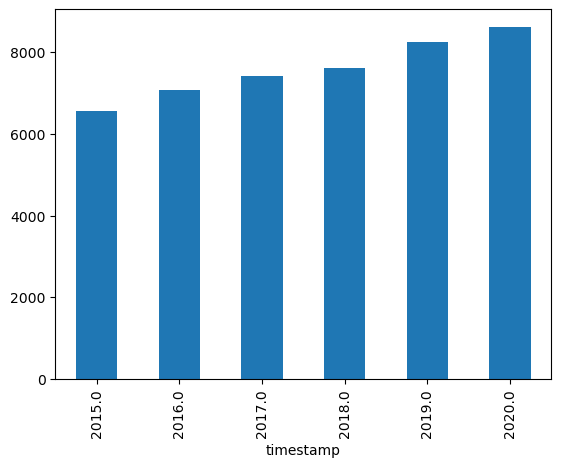

In [105]:
mean_altitude_per_year.plot(kind="bar");

**Exercise:** Calculate the `sum` of injuries per year. Use the fact that `True + True = 2` ;)

We can also create a new `Series` if the corresponding column does not exist in the dataframe and group it by another `Series`
(which in this case is a column from the dataframe). Important is that the grouped and the by series have the same index.

In [106]:
# how many incidents per million inhabitants are there for each state?
incidents_per_million = (1_000_000 / laser_incidents_w_population["Population"]).groupby(laser_incidents_w_population["State"]).sum()
incidents_per_million.sort_values(ascending=False)

State
Hawaii                  347.174968
Puerto Rico             283.072541
District of Columbia    272.401284
Nevada                  263.392087
Arizona                 259.539186
Utah                    233.376716
Oregon                  211.078085
Kentucky                210.978412
Guam                    201.841314
New Mexico              189.746676
California              186.218871
Colorado                169.180226
Washington              126.127279
Tennessee               125.933528
Idaho                   122.225872
Florida                 121.466464
Texas                   120.547839
Montana                 119.337375
Indiana                 118.834422
North Dakota            118.060573
Oklahoma                102.492661
Alabama                  93.214901
Minnesota                92.877892
Alaska                   91.332542
Missouri                 88.540597
Arkansas                 77.816234
Louisiana                76.466573
Illinois                 75.186584
Rhode Island  

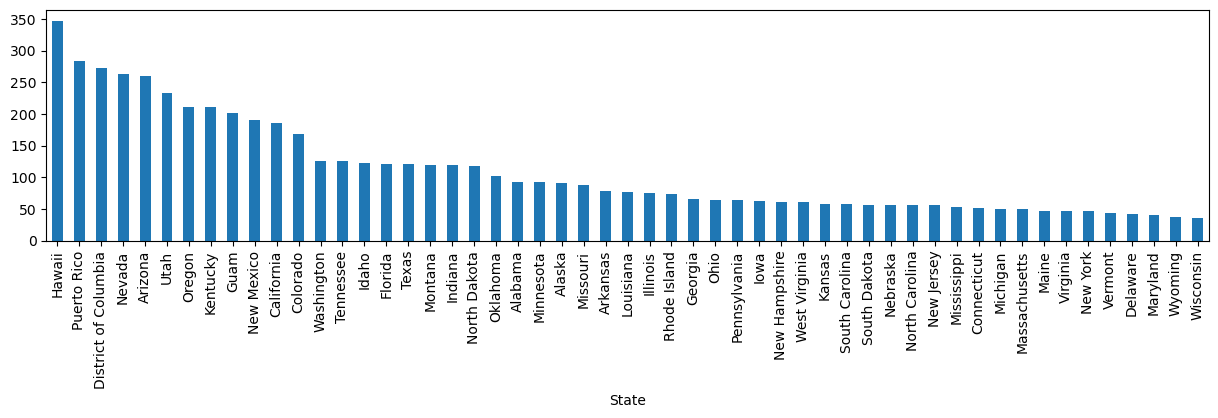

In [107]:
incidents_per_million.sort_values(ascending=False).plot(kind="bar", figsize=(15, 3));

## Time series operations

We will briefly look at some more specific operation for time series data (data with a natural time axis).
Typical operations for time series are resampling or rolling window transformations such as filtering.
Note that Pandas is not a general digital signal processing library - there are other (more capable) tools for this purpose.

First, we set the index to `"timestamp"` to make our dataframe inherently time indexed. This will make doing further time operations easier.

In [108]:
incidents_w_time_index = laser_incidents.set_index("timestamp")
incidents_w_time_index

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State
timestamp,,,,,,,,,,
2020-01-01 01:48:00,2020-01-01,148,N424RP,DA42/A,8500.0,SBA,green,False,Santa Barbara,California
2020-01-01 01:55:00,2020-01-01,155,AMF1829,B190,40000.0,SSF,green,False,San Antonio,Texas
2020-01-01 02:14:00,2020-01-01,214,NKS1881,A320,2500.0,TPA,green,False,Tampa,Florida
2020-01-01 02:17:00,2020-01-01,217,FDX3873,B763,3000.0,DFW,green,False,Fort Worth,Texas
2020-01-01 02:18:00,2020-01-01,218,SWA3635,B739,11000.0,MOD,green,False,Modesto,California
...,...,...,...,...,...,...,...,...,...,...
2015-12-31 05:25:00,2015-12-31,525,VRD917,A320 (AIRBUS - A-32,8000.0,LAS,green,False,Las Vegas,Nevada
2015-12-31 06:23:00,2015-12-31,623,DAL2371,B738 (BOEING - 737-,11000.0,LHM,green,False,Lincoln,California
2015-12-31 11:11:00,2015-12-31,1111,Unknown,Unknown,2000.0,FOK,green,False,Westhampton Beach,New York


First, turn the data into a time series of incidents per hour. This can be done by resampling to 1 hour and using 
`count` (basically on any column or on any column that has any non-NA value) to count the number of incidents.

In [109]:
incidents_hourly = incidents_w_time_index.notna().any(axis="columns").resample("1H").count().rename("incidents per hour")
incidents_hourly

timestamp
2015-01-01 02:00:00    1
2015-01-01 03:00:00    2
2015-01-01 04:00:00    1
2015-01-01 05:00:00    3
2015-01-01 06:00:00    0
                      ..
2020-08-01 06:00:00    0
2020-08-01 07:00:00    1
2020-08-01 08:00:00    1
2020-08-01 09:00:00    0
2020-08-01 10:00:00    3
Name: incidents per hour, Length: 48945, dtype: int64

Looking at those data gives us a bit too detailed information.

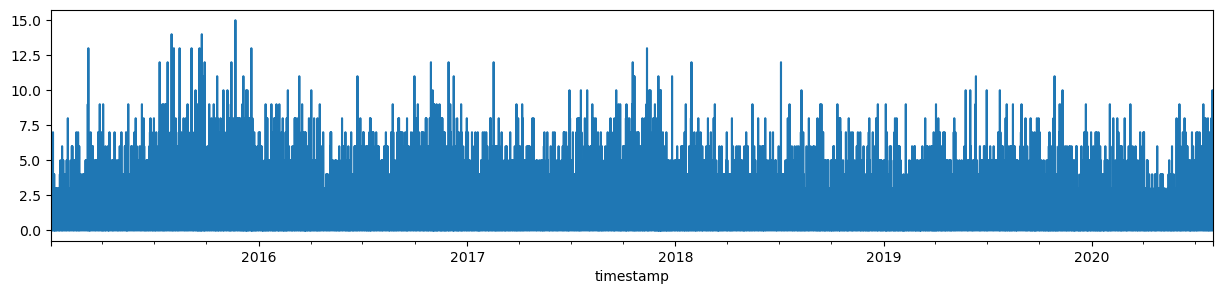

In [110]:
incidents_hourly.sort_index().plot(kind="line", figsize=(15, 3));

A daily mean, the result of resampling to 1 day periods and calculating the mean, is already something more digestible. 
Though still a bit noisy.

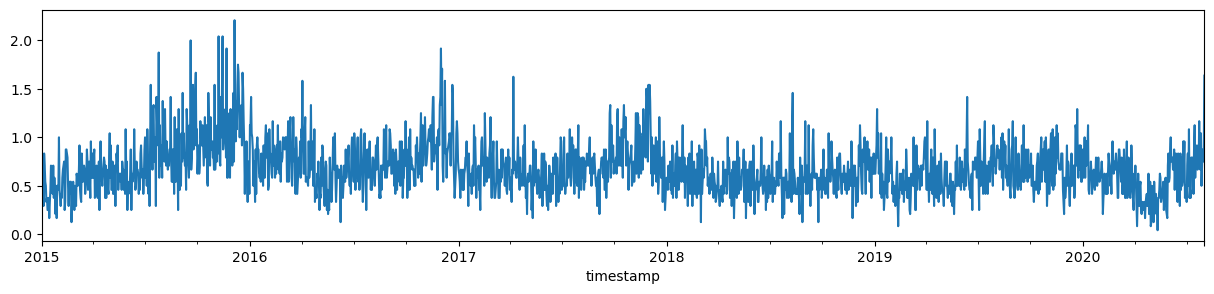

In [111]:
incidents_daily = incidents_hourly.resample("1D").mean()
incidents_daily.plot.line(figsize=(15, 3));

We can look at filtered data by rolling mean with, e.g., 28 days window size.

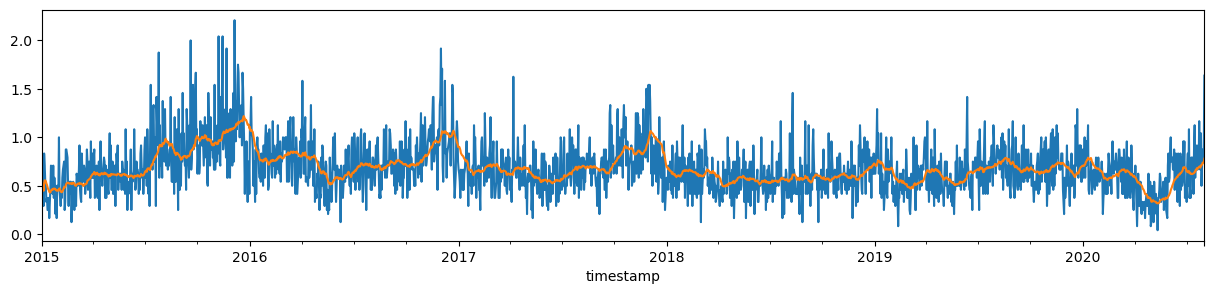

In [112]:
incidents_daily_filtered = incidents_daily.rolling("28D").mean()
incidents_daily.plot.line(figsize=(15, 3));
incidents_daily_filtered.plot.line(figsize=(15, 3));

## Pivoting (Optional)

> pivot (third-person singular simple present pivots, present participle pivoting, simple past and past participle pivoted)
 **To turn on an exact spot.**
 
> A pivot table is a table of statistics that summarizes the data of a more extensive table ...
> Although pivot table is a generic term, Microsoft Corporation trademarked PivotTable in the United States in 1994.

Our pivoting task: Get a table with numbers of titles per year (as row) and type (as column).

One approach is to use `groupby`, `count` aggregation and `unstack`.

In [113]:
grouped_by_year_and_month = laser_incidents_w_population.groupby(
    [
        laser_incidents_w_population["timestamp"].dt.year.astype("Int16"),
        laser_incidents_w_population["timestamp"].dt.month.astype("Int16"),
    ]
)

In [114]:
incidents_by_year_and_month = grouped_by_year_and_month["timestamp"].count().rename_axis(index=["year", "month"]).rename("incidents")
incidents_by_year_and_month

year  month
2015  1        349
      2        339
      3        448
      4        444
      5        450
              ... 
2020  4        254
      5        301
      6        486
      7        542
      8         18
Name: incidents, Length: 68, dtype: int64

In [115]:
pivot_by_year_and_month = incidents_by_year_and_month.unstack().fillna(0)
pivot_by_year_and_month

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,349.0,339.0,448.0,444.0,450.0,445.0,669.0,609.0,706.0,687.0,763.0,797.0
2016,594.0,542.0,602.0,532.0,419.0,456.0,529.0,525.0,531.0,569.0,707.0,723.0
2017,479.0,466.0,472.0,484.0,410.0,414.0,500.0,510.0,507.0,650.0,678.0,570.0
2018,479.0,410.0,441.0,383.0,429.0,389.0,415.0,424.0,426.0,450.0,414.0,524.0
2019,508.0,327.0,445.0,428.0,396.0,476.0,530.0,556.0,469.0,480.0,510.0,510.0
2020,497.0,432.0,437.0,254.0,301.0,486.0,542.0,18.0,0.0,0.0,0.0,0.0


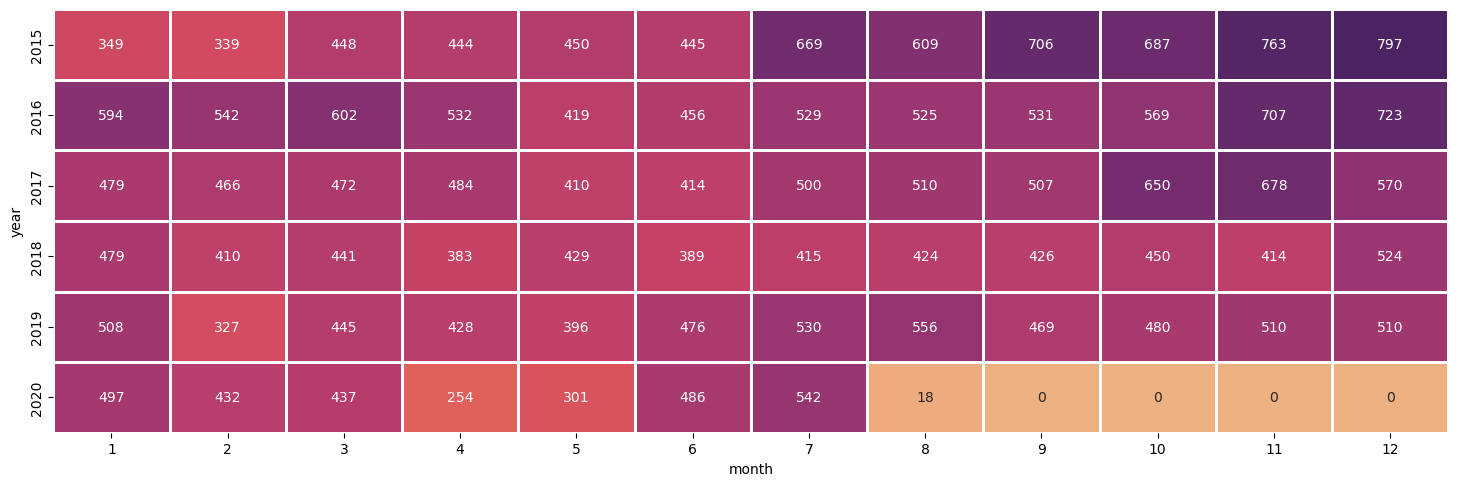

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt


_, ax = plt.subplots(figsize=(18,5.5))   # A large enough figure
sns.heatmap(
    pivot_by_year_and_month,
    ax=ax,                  # We draw in an existing `Axes`
    linewidths=1,           # Separation of boxes
    annot=True,             # We want to see the values
    fmt=".0f",              # We want to format the values as integers
    cmap="flare",           # We choose a pallette
    cbar=False,             # We hide the explanatory bar for colours
);

The are also shortcut functions and methods: [DataFrame.pivot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html), 
[pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)
or [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html). 
A nice overview is in the the [Pandas documentation: Reshaping and pivot tables](https://pandas.pydata.org/docs/user_guide/reshaping.html).